# VOSK Speech Recognition Feature Extraction

|Category(ies)         |References            |Input Type            |Workflows             |Next Steps            |
|----------------------|----------------------|----------------------|----------------------|----------------------|
|feature extraction|[dps repo](https://github.com/jdchart/dps)|results of a speech recognition anlysis|||

In this notebook, we'll take a "raw" speech recognition analysis of an audio file, and extract a number of different features from it. Many of these features we're developed in the context of Théo Heugebaert's PhD on rhythm in the performing arts, and are part of the [dps python package](https://github.com/jdchart/dps.git) which was designed for his project.

## 1. Setup
First, let's import all of the various packages that we'll need.

In [6]:
# Installs
import sys
!echo "Purging pip environment and installing packages..."
!{sys.executable} -m pip cache purge > /dev/null 2>&1
!{sys.executable} -m pip uninstall -y jlu > /dev/null 2>&1
!{sys.executable} -m pip install -q git+https://github.com/arvest-data-in-context/jlu > /dev/null 2>&1
!{sys.executable} -m pip uninstall -y dps > /dev/null 2>&1
!{sys.executable} -m pip install -q git+https://github.com/jdchart/dps.git > /dev/null 2>&1

# Imports
print("Importing packages...")
import os
import jlu
import dps
import matplotlib.pyplot as plt
import numpy as np
print("Ready!")

Purging pip environment and installing packages...
Importing packages...
Ready!


## 2. Load VOSK Analysis
Here we shall load the json output of the VOSK analyses we wish to process. Note that this notebook is specifically tailored to extract features from the VOSK speech recognition notebook in this collection of notebooks, however it wouldn't take much to adjust it for the output of another speech recognition model. Change the `VOSK_ANALYSES` variable to the folder that contains the analyses you wish to process.

In [10]:
VOSK_ANALYSES = os.path.join(os.path.abspath('../../..'), "RENAMED_JSON")
analysis_files = jlu.files.collect_files(VOSK_ANALYSES, ["json"])
print(analysis_files)

['/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/6.json', '/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/0.json', '/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/1.json', '/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/2.json', '/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/3.json', '/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/4.json', '/Users/jacob/Documents/Repos/arvest-data-in-context/ml-notebooks/RENAMED_JSON/5.json']


## 3. Feature Extraction
Now we can use the [dps python package](https://github.com/jdchart/dps.git) to extract the various features. We shall do this for each file.

Before we process everything, let's just take a closer look at one instance in order to understand what's happening under the hood.

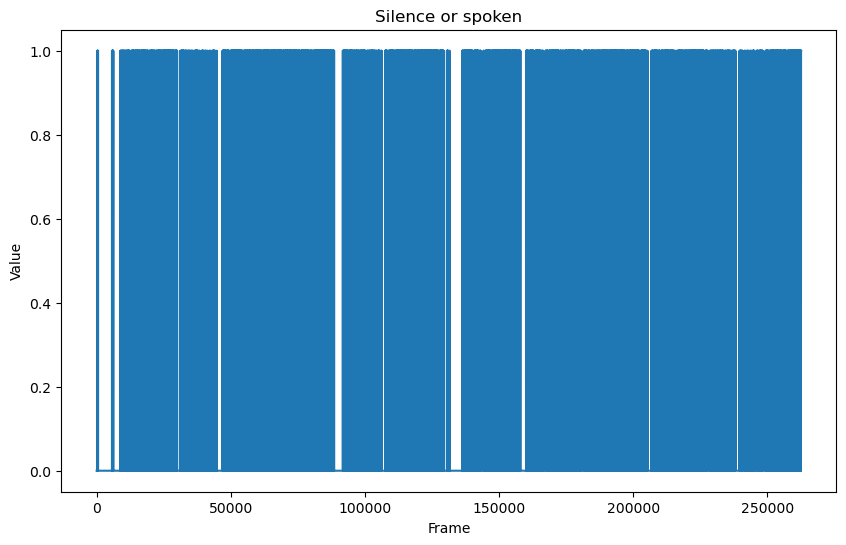

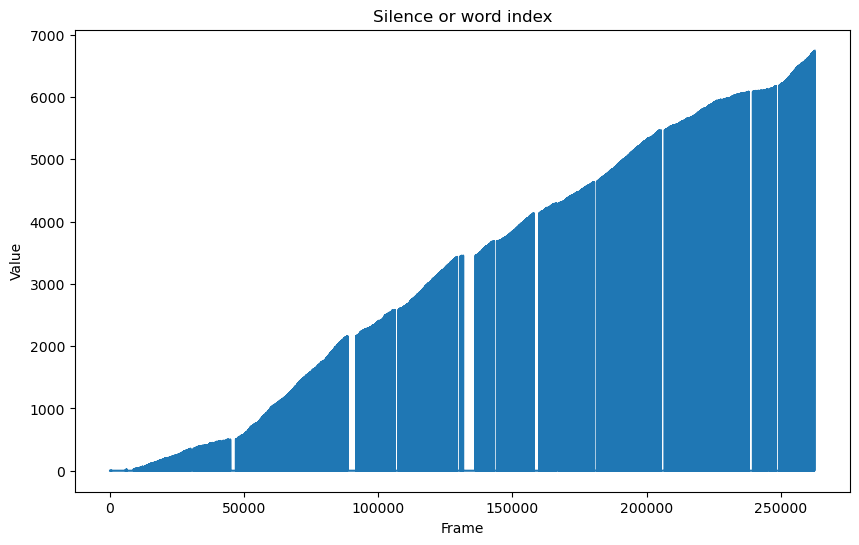

In [23]:
# First we load the analysis file in the dps.SpeechAnalysis() class
speech_recognition = dps.SpeechAnalysis(analysis_files[2])

# This will have already parsed the data into a raw curve which can be visualized:
speech_recognition.display_raw_curve(0)
speech_recognition.display_raw_curve(1)

Note that each feature has a number of different parameters. You can extract as many features as you wish, with varying different parameters.

Now we can extract features like dps as follows:

0.13043478260869565
0.1
0.15384615384615385


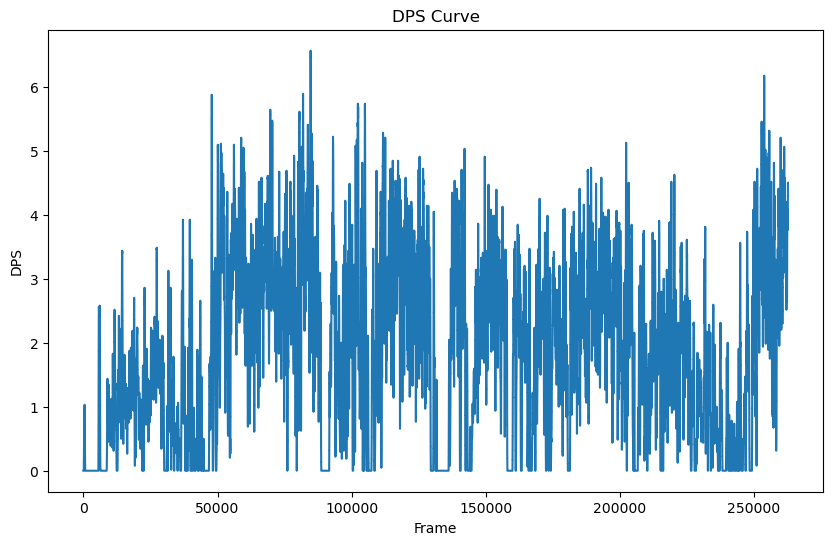

In [25]:
# Get the dps across a region:
# print(speech_recognition.get_dps())
print(speech_recognition.get_dps(region = {"start_ms" : 0, "end_ms" : 92000}))
print(speech_recognition.get_dps(region = {"start_ms" : 0, "end_ms" : 40000}))
print(speech_recognition.get_dps(region = {"start_ms" : 40000, "end_ms" : 92000}))

# Get DPS as a feature curve:
dps_curve = speech_recognition.get_dps_feature_curve(128, 4)

# Visualize:
plt.figure(figsize=(10, 6))
frame_numbers = np.arange(len(dps_curve))
plt.plot(frame_numbers, dps_curve, drawstyle='steps-post')
plt.xlabel('Frame')
plt.ylabel('DPS')
plt.title('DPS Curve')
plt.show()

## 4. Export to CSV

Now we can take this data, and export it to a csv file to use later. First lets set the output location.

In [ ]:
# Give a path to a folder to output the results:
PROCESS_OUTPUT = os.path.join(os.path.abspath('../../..'), "output")

# Create folder if needed:
if os.path.isdir(PROCESS_OUTPUT) == False:
    os.makedirs(PROCESS_OUTPUT)

We can use the dps `numpy_to_csv` function to easily export the results.

In [ ]:
dps.numpy_to_csv(
    os.path.join(PROCESS_OUTPUT, os.path.splitext(os.path.basename(analysis_files[0]))[0] + ".csv"), [
        {"header" : "Raw silence/spoken", "array" : speech_recognition.raw_curve[0]},
        {"header" : "Raw silence/word", "array" : speech_recognition.raw_curve[1]},
        {"header" : "DPS Feature Curve", "array" : dps_curve}
    ]
)